# Loading data(数据读取)

In [11]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows",150)
set_option('display.width', 200)
import seaborn as sns

import math

# import tensorflow as tf

In [12]:
# 定义要处理的元素
element_name = "DTXX"

In [13]:
# filename = 'data.csv'
# 读取A、B部分共有数据
filename = 'GY1_R_0.1250m_QSK_2107m-2587m.csv'
dataPath = os.path.join('../data/exp_curve_reconstract/exp_1/train/QSK')
file = os.path.join(dataPath,filename)
AB = pd.read_csv(file,engine='python',encoding='GBK')
# AB = pd.read_csv(filename,engine='python',encoding='GBK')
AB

,DEPTH,DT,CNL,DEN,GR,RD,RS,DTXX
0,2107.000,82.196225,17.3,2.451,120,4.91,5.11,168.247598
1,2107.125,81.984576,16.9,2.444,118,5.18,5.37,166.368776
2,2107.250,81.677681,16.3,2.437,116,5.40,5.60,165.172409
3,2107.375,81.509332,15.8,2.435,114,5.55,5.76,164.581235
4,2107.500,81.742845,15.7,2.448,116,5.57,5.82,164.762338
...,...,...,...,...,...,...,...,...
3836,2586.500,86.894184,15.4,2.652,138,5.31,6.30,169.218485
3837,2586.625,85.568864,14.9,2.651,136,5.35,6.32,162.964982
3838,2586.750,81.355412,14.0,2.646,135,5.59,6.52,156.272841
3839,2586.875,76.638988,12.5,2.645,127,6.50,7.39,149.232910


In [14]:
# 打印相关性矩阵
# print(AB.corr())
AB.corr()

,DEPTH,DT,CNL,DEN,GR,RD,RS,DTXX
DEPTH,1.000000,0.589128,0.238637,0.153414,0.214205,0.199801,0.260834,0.059051
DT,0.589128,1.000000,0.707618,-0.205513,0.412469,-0.254441,-0.204107,0.704776
CNL,0.238637,0.707618,1.000000,-0.440269,0.248548,-0.348371,-0.335618,0.677237
DEN,0.153414,-0.205513,-0.440269,1.000000,0.058896,0.132567,0.117171,-0.354685
GR,0.214205,0.412469,0.248548,0.058896,1.000000,-0.328410,-0.321766,0.351554
RD,0.199801,-0.254441,-0.348371,0.132567,-0.328410,1.000000,0.967258,-0.442773
RS,0.260834,-0.204107,-0.335618,0.117171,-0.321766,0.967258,1.000000,-0.438165
DTXX,0.059051,0.704776,0.677237,-0.354685,0.351554,-0.442773,-0.438165,1.000000


# Obtain the top-N dimensions with the highest correlation coefficient (得出相关系数最大的N个维度)

In [69]:
N = int(7)

In [70]:
# 用.isnull().sum()检查每个变量中缺失值的占比：
AB.isnull().sum()/len(AB)*100

DEPTH    0.0
DT       0.0
CNL      0.0
DEN      0.0
GR       0.0
RD       0.0
RS       0.0
DTXX     0.0
dtype: float64

In [71]:
CORR_AB = AB.corr()

In [72]:
# # 保存变量中的缺失值

# a = AB.isnull().sum()/len(AB)*100

# # 保存列名

# variables = AB.columns

# variable = [ ]

# for i in range(0,12):
#     if a[i]<=20: #setting the threshold as 20%
#         variable.append(variables[i])

In [73]:
CORR_AB.sort_values(by = element_name, ascending = True)

,DEPTH,DT,CNL,DEN,GR,RD,RS,DTXX
RD,0.199801,-0.254441,-0.348371,0.132567,-0.328410,1.000000,0.967258,-0.442773
RS,0.260834,-0.204107,-0.335618,0.117171,-0.321766,0.967258,1.000000,-0.438165
DEN,0.153414,-0.205513,-0.440269,1.000000,0.058896,0.132567,0.117171,-0.354685
DEPTH,1.000000,0.589128,0.238637,0.153414,0.214205,0.199801,0.260834,0.059051
GR,0.214205,0.412469,0.248548,0.058896,1.000000,-0.328410,-0.321766,0.351554
CNL,0.238637,0.707618,1.000000,-0.440269,0.248548,-0.348371,-0.335618,0.677237
DT,0.589128,1.000000,0.707618,-0.205513,0.412469,-0.254441,-0.204107,0.704776
DTXX,0.059051,0.704776,0.677237,-0.354685,0.351554,-0.442773,-0.438165,1.000000


In [74]:
CORR_AB_New = CORR_AB.sort_values(by = element_name, ascending = True)

In [75]:
CORR_AB_New[element_name]

RD      -0.442773
RS      -0.438165
DEN     -0.354685
DEPTH    0.059051
GR       0.351554
CNL      0.677237
DT       0.704776
DTXX     1.000000
Name: DTXX, dtype: float64

In [76]:
abs(CORR_AB_New[element_name])[0:N]

RD       0.442773
RS       0.438165
DEN      0.354685
DEPTH    0.059051
GR       0.351554
CNL      0.677237
DT       0.704776
Name: DTXX, dtype: float64

In [77]:
cols_name = CORR_AB_New[element_name][0:N]

In [78]:
cols_name.index

Index(['RD', 'RS', 'DEN', 'DEPTH', 'GR', 'CNL', 'DT'], dtype='object')

In [79]:
list= cols_name.index.tolist()
list

['RD', 'RS', 'DEN', 'DEPTH', 'GR', 'CNL', 'DT']

In [80]:
X = None
for col_name in list:
    input_x = AB.loc[:,col_name]
    X = pd.concat([X,input_x],axis=1)

In [81]:
X

,RD,RS,DEN,DEPTH,GR,CNL,DT
0,4.91,5.11,2.451,2107.000,120,17.3,82.196225
1,5.18,5.37,2.444,2107.125,118,16.9,81.984576
2,5.40,5.60,2.437,2107.250,116,16.3,81.677681
3,5.55,5.76,2.435,2107.375,114,15.8,81.509332
4,5.57,5.82,2.448,2107.500,116,15.7,81.742845
...,...,...,...,...,...,...,...
3836,5.31,6.30,2.652,2586.500,138,15.4,86.894184
3837,5.35,6.32,2.651,2586.625,136,14.9,85.568864
3838,5.59,6.52,2.646,2586.750,135,14.0,81.355412
3839,6.50,7.39,2.645,2586.875,127,12.5,76.638988


In [82]:
Y = AB.loc[:,element_name] 

In [83]:
corr_pre_data = pd.concat([X,Y],axis=1)
corr_pre_data

,RD,RS,DEN,DEPTH,GR,CNL,DT,DTXX
0,4.91,5.11,2.451,2107.000,120,17.3,82.196225,168.247598
1,5.18,5.37,2.444,2107.125,118,16.9,81.984576,166.368776
2,5.40,5.60,2.437,2107.250,116,16.3,81.677681,165.172409
3,5.55,5.76,2.435,2107.375,114,15.8,81.509332,164.581235
4,5.57,5.82,2.448,2107.500,116,15.7,81.742845,164.762338
...,...,...,...,...,...,...,...,...
3836,5.31,6.30,2.652,2586.500,138,15.4,86.894184,169.218485
3837,5.35,6.32,2.651,2586.625,136,14.9,85.568864,162.964982
3838,5.59,6.52,2.646,2586.750,135,14.0,81.355412,156.272841
3839,6.50,7.39,2.645,2586.875,127,12.5,76.638988,149.232910


D:\Program Files\Python310\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


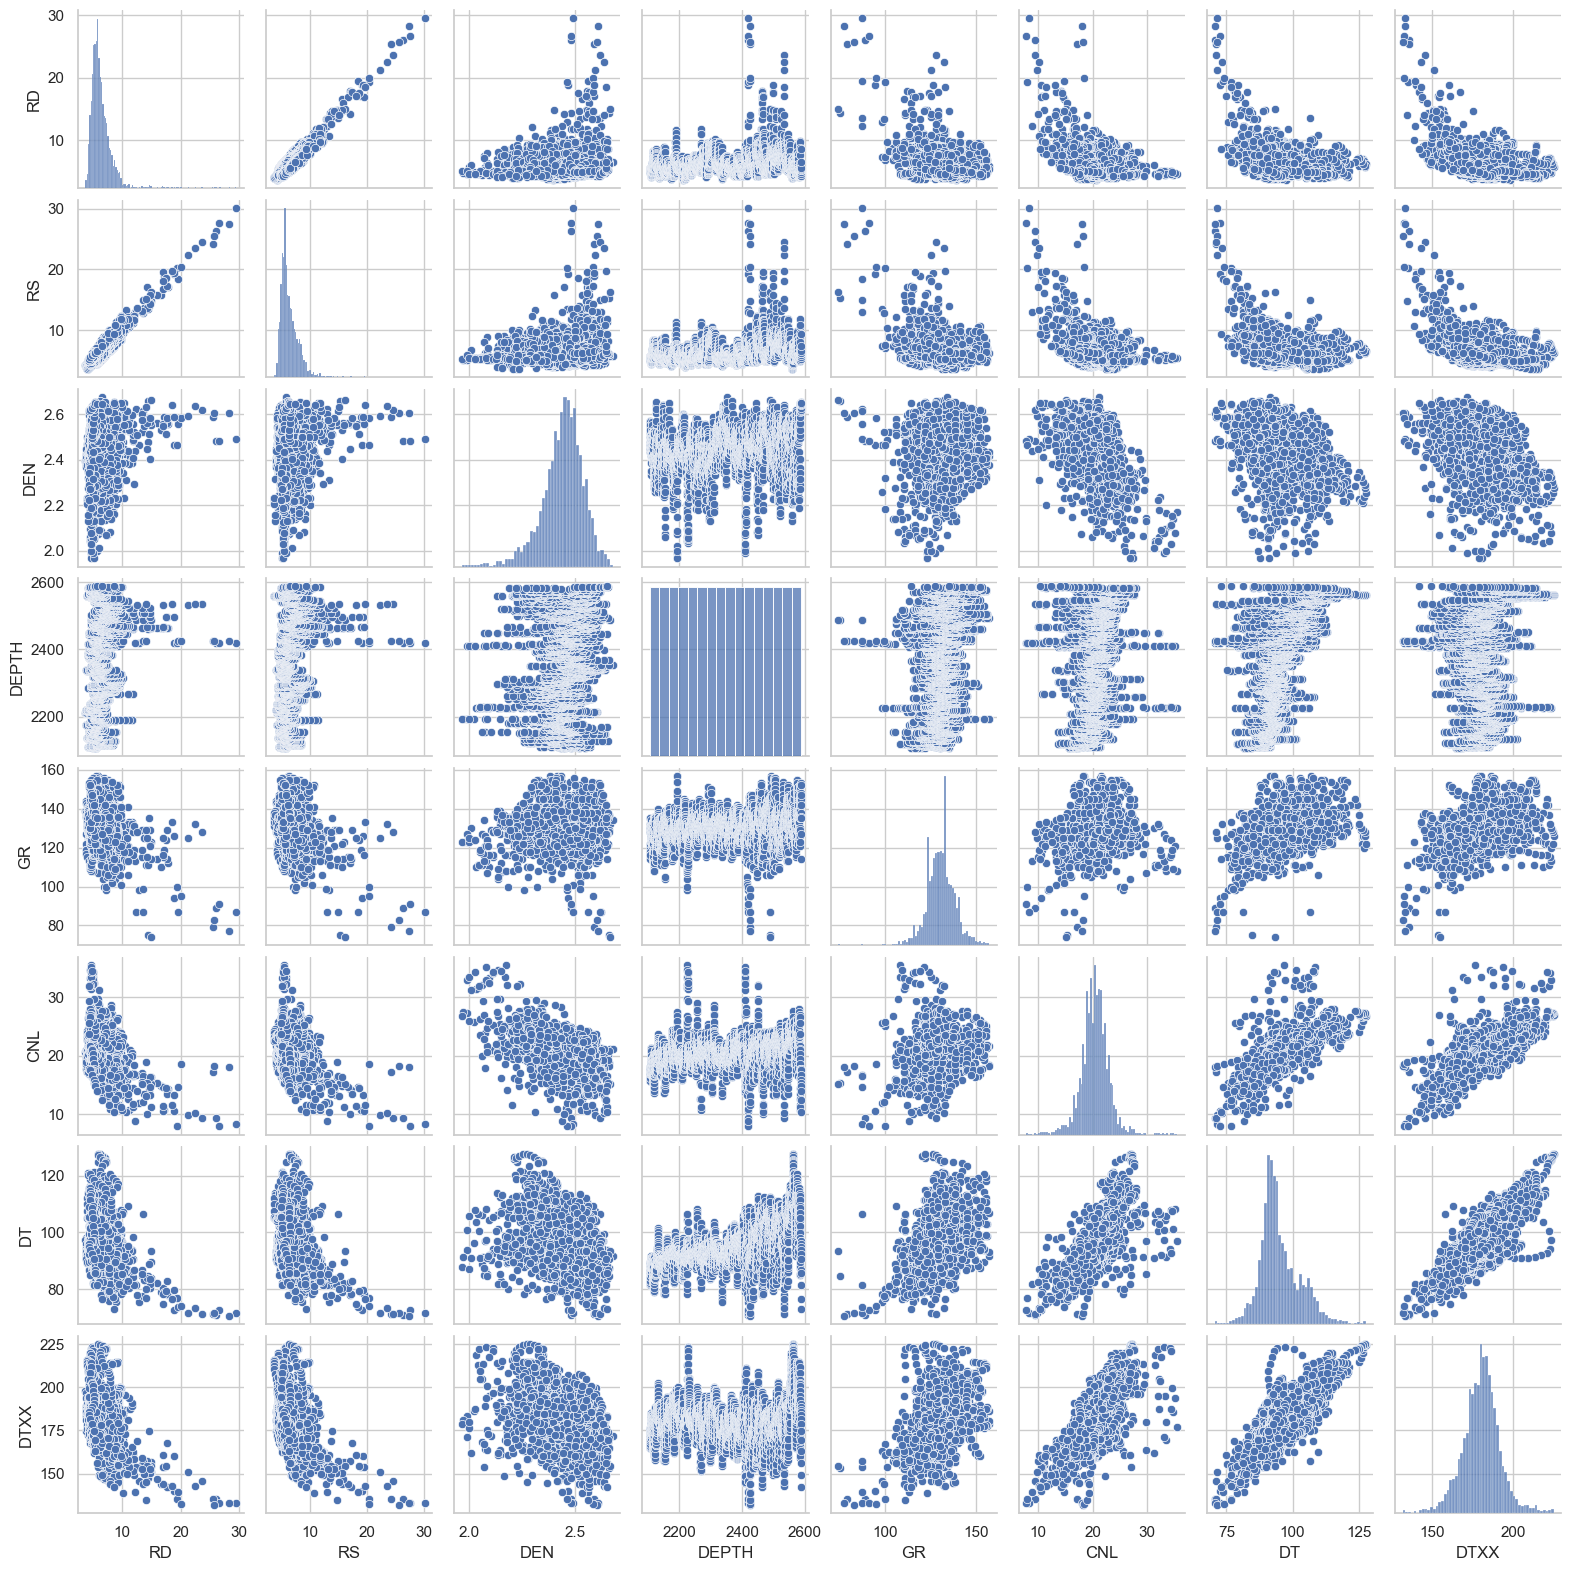

In [84]:
sns.set(style='whitegrid', context='notebook')   #style控制默认样式,context控制着默认的画幅大小
# sns.pairplot(AB, size=5)
# sns.pairplot(analy_data, size=3)
# 保存结果图
fig = sns.pairplot(corr_pre_data, size=2)

<AxesSubplot: >

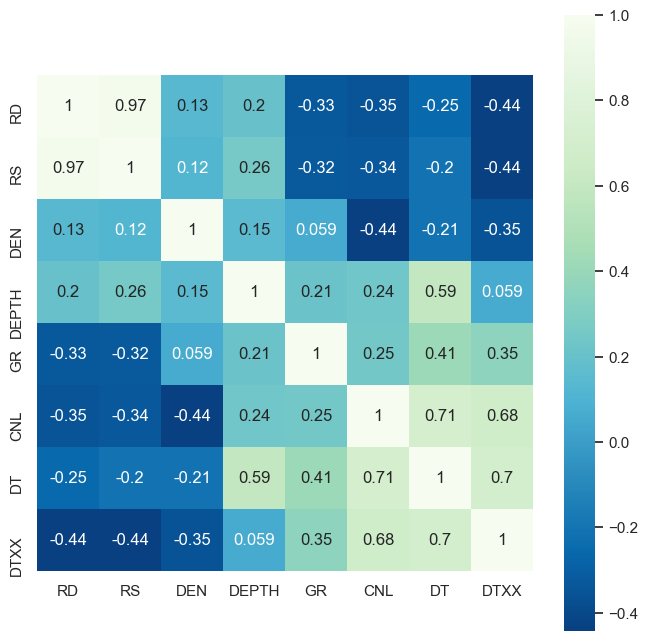

In [85]:
# corr = AB.corr()
plt.figure(figsize=(8,8))
corr_pre_data_heat = corr_pre_data.corr()
# 相关度热力图
sns.heatmap(corr_pre_data_heat, cmap='GnBu_r', square=True, annot=True)
# plt.savefig('heatmap.png')

# Modeling all dimensions(对所有维度进行建模)

In [86]:
# X = AB.loc[:,'A1':'A128']

In [87]:
# Y = AB.loc[:,'POR_JA':'RO'] 
# Y = AB.loc[:,element_name]  
# df=AB.drop('Item_Outlet_Sales', 1)

In [88]:
# target_names = element_name

In [89]:
# X.corr()

In [90]:
X

,RD,RS,DEN,DEPTH,GR,CNL,DT
0,4.91,5.11,2.451,2107.000,120,17.3,82.196225
1,5.18,5.37,2.444,2107.125,118,16.9,81.984576
2,5.40,5.60,2.437,2107.250,116,16.3,81.677681
3,5.55,5.76,2.435,2107.375,114,15.8,81.509332
4,5.57,5.82,2.448,2107.500,116,15.7,81.742845
...,...,...,...,...,...,...,...
3836,5.31,6.30,2.652,2586.500,138,15.4,86.894184
3837,5.35,6.32,2.651,2586.625,136,14.9,85.568864
3838,5.59,6.52,2.646,2586.750,135,14.0,81.355412
3839,6.50,7.39,2.645,2586.875,127,12.5,76.638988


In [91]:
Y

0       168.247598
1       166.368776
2       165.172409
3       164.581235
4       164.762338
           ...    
3836    169.218485
3837    162.964982
3838    156.272841
3839    149.232910
3840    142.077324
Name: DTXX, Length: 3841, dtype: float64

In [92]:
analy_data = pd.concat([X,Y],axis=1)
analy_data

,RD,RS,DEN,DEPTH,GR,CNL,DT,DTXX
0,4.91,5.11,2.451,2107.000,120,17.3,82.196225,168.247598
1,5.18,5.37,2.444,2107.125,118,16.9,81.984576,166.368776
2,5.40,5.60,2.437,2107.250,116,16.3,81.677681,165.172409
3,5.55,5.76,2.435,2107.375,114,15.8,81.509332,164.581235
4,5.57,5.82,2.448,2107.500,116,15.7,81.742845,164.762338
...,...,...,...,...,...,...,...,...
3836,5.31,6.30,2.652,2586.500,138,15.4,86.894184,169.218485
3837,5.35,6.32,2.651,2586.625,136,14.9,85.568864,162.964982
3838,5.59,6.52,2.646,2586.750,135,14.0,81.355412,156.272841
3839,6.50,7.39,2.645,2586.875,127,12.5,76.638988,149.232910


In [93]:
# sns.set(style='whitegrid', context='notebook')   #style控制默认样式,context控制着默认的画幅大小
# # sns.pairplot(AB, size=5)
# # sns.pairplot(analy_data, size=3)
# # 保存结果图
# fig = sns.pairplot(analy_data, size=3)
# # fig.savefig("images/pairplot.png", dpi=100)

In [94]:
# 相关度
corr = analy_data.corr()
# corr = analy_data.corr()
# # 相关度热力图
# fig = plt.figure(figsize=(25, 25))
# fig = sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)
# # plt.savefig('heatmap.png')
# plt.show()

In [95]:
corr

,RD,RS,DEN,DEPTH,GR,CNL,DT,DTXX
RD,1.000000,0.967258,0.132567,0.199801,-0.328410,-0.348371,-0.254441,-0.442773
RS,0.967258,1.000000,0.117171,0.260834,-0.321766,-0.335618,-0.204107,-0.438165
DEN,0.132567,0.117171,1.000000,0.153414,0.058896,-0.440269,-0.205513,-0.354685
DEPTH,0.199801,0.260834,0.153414,1.000000,0.214205,0.238637,0.589128,0.059051
GR,-0.328410,-0.321766,0.058896,0.214205,1.000000,0.248548,0.412469,0.351554
CNL,-0.348371,-0.335618,-0.440269,0.238637,0.248548,1.000000,0.707618,0.677237
DT,-0.254441,-0.204107,-0.205513,0.589128,0.412469,0.707618,1.000000,0.704776
DTXX,-0.442773,-0.438165,-0.354685,0.059051,0.351554,0.677237,0.704776,1.000000


# PCA calculation(PCA计算)

In [96]:
# print(X.shape,len(X))#原始变量维度

In [97]:
# Y = np.array(Y).reshape(1, -1)

In [98]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
# X_p= pca.fit(X).transform(Y)

# print(X.shape)#原始变量维度

# print(X_p.shape)#主成分变量的维度

In [99]:
# X_p

In [100]:
# print('各主成分贡献度:{}'.format(pca.explained_variance_ratio_))

In [101]:
# # range(n) 中的n为主成分数
# plt.plot(range(3), pca.explained_variance_ratio_)
# plt.plot(range(3), np.cumsum(pca.explained_variance_ratio_))
# plt.title("Component-wise and Cumulative Explained Variance")

In [102]:
# np.set_printoptions(suppress=True, threshold=200000)
# X_p

In [103]:
# X_p.shape

# Principal Component Regression Python Implementation(主成分回归python实现)
https://blog.csdn.net/qq_43315928/article/details/91404910

In [104]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [105]:
# z_score标准化方法（x - u)/sigma
# 对数据进行标准化
X = (X - X.mean())/np.std(X)
Y = (Y - Y.mean())/np.std(Y)

D:\Program Files\Python310\lib\site-packages\numpy\core\fromnumeric.py:3613: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [106]:
# 对数据进行分割
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=1)

In [107]:
# # 创建pca模型
# # pca = PCA(n_components='mle')
# pca = PCA(n_components=3)
# # 对模型进行训练
# pca.fit(X_train)
# # 返回降维后据
# X_train_p = pca.transform(X_train)

In [108]:
# 方法1：使用返回后的数据用线性回归模型进行建模
import statsmodels.api as sm
# X_train_p= sm.add_constant(X_train_p) # adding a constant
# ols = sm.OLS(Y_train, X_train_p).fit()
ols = sm.OLS(Y_train, X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   DTXX   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              1123.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:03:14   Log-Likelihood:                         -2420.5
No. Observations:                3072   AIC:                                      4855.
Df Residuals:                    3065   BIC:                                      4897.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RD             0.1875      0.039      4.775      0.000       0.111       0.265
RS            -0.2796      0.040     -6.913      0.000      -0.359      -0.200
DEN           -0.0573      0.012     -4.980      0.000      -0.080      -0.035
DEPTH         -0.4216      0.015    -28.826      0.000      -0.450      -0.393
GR             0.0475      0.011      4.250      0.000       0.026       0.069
CNL            0.1334      0.016      8.491      0.000       0.103       0.164
DT             0.8197      0.018     44.629      0.000       0.784       0.856
==============================================================================
Omnibus:                      209.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.306
Skew:                           0.503   Prob(JB):                     8.66e-82
Kurtosis:                       4.381   Cond. No.                         9.77
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# 将测试的数据维度进行PCA
# X_test_p = pca.transform(X_test)

In [110]:
# predictions = ols.predict(X_test_p)
predictions = ols.predict(X_test)

In [111]:
predictions.shape,predictions

((769,),
 17     -0.171503
 3583    1.606506
 2765    0.089044
 1120    0.206219
 1195    1.086851
           ...   
 1030   -0.045347
 1776   -0.259309
 3048   -2.790313
 1814   -0.306549
 3137    0.111639
 Length: 769, dtype: float64)

# Fitting using LinearRegression(使用LinearRegression进行拟合)

In [112]:
# 方法2：使用LinearRegression进行拟合，其实这两种拟合的都差不多
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# lr.fit(X_train_p,Y_train)   # 模型训练
lr.fit(X_train,Y_train)   # 模型训练
# lr.score(X_train_p, Y_train) # 获取模型的得分
lr.score(X_train, Y_train) # 获取模型的得分

0.7195053700880994

In [113]:
y_pred = lr.predict(X_test)
# y_pred = lr.predict(X_test_p)

In [114]:
olsr = sm.OLS(y_pred, Y_test).fit()
olsr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              1869.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):                   6.57e-208
Time:                        16:03:15   Log-Likelihood:                         -481.86
No. Observations:                 769   AIC:                                      965.7
Df Residuals:                     768   BIC:                                      970.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DTXX           0.7197      0.017     43.230      0.000       0.687       0.752
==============================================================================
Omnibus:                      124.597   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.005
Skew:                          -0.795   Prob(JB):                     2.74e-81
Kurtosis:                       6.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""